<a href="https://colab.research.google.com/github/MulamHema/ml_intern/blob/main/task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Load the dataset
df = pd.read_csv('/content/Used Car Dataset.csv')

# Summary statistics
print(df.describe())


        Unnamed: 0         seats     kms_driven  mileage(kmpl)    engine(cc)  \
count  1553.000000   1553.000000    1553.000000    1550.000000  1.550000e+03   
mean    776.000000     91.480361   52841.931101     236.927277  1.471857e+10   
std     448.456798   2403.424060   40067.800347     585.964295  2.185629e+11   
min       0.000000      4.000000     620.000000       7.810000  5.000000e+00   
25%     388.000000      5.000000   30000.000000      16.342500  1.197000e+03   
50%     776.000000      5.000000   49134.000000      18.900000  1.462000e+03   
75%    1164.000000      5.000000   70000.000000      22.000000  1.995000e+03   
max    1552.000000  67000.000000  810000.000000    3996.000000  3.258640e+12   

       max_power(bhp)    torque(Nm)  price(in lakhs)  
count    1.550000e+03  1.549000e+03      1553.000000  
mean     1.471857e+10  1.423989e+04       166.141494  
std      2.185629e+11  9.666241e+04      3478.855090  
min      5.000000e+00  5.000000e+00         1.000000  
25% 

In [ ]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1553 entries, 0 to 1552
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1553 non-null   int64  
 1   car_name            1553 non-null   object 
 2   registration_year   1553 non-null   object 
 3   insurance_validity  1553 non-null   object 
 4   fuel_type           1553 non-null   object 
 5   seats               1553 non-null   int64  
 6   kms_driven          1553 non-null   int64  
 7   ownsership          1553 non-null   object 
 8   transmission        1553 non-null   object 
 9   manufacturing_year  1553 non-null   object 
 10  mileage(kmpl)       1550 non-null   float64
 11  engine(cc)          1550 non-null   float64
 12  max_power(bhp)      1550 non-null   float64
 13  torque(Nm)          1549 non-null   float64
 14  price(in lakhs)     1553 non-null   float64
dtypes: float64(5), int64(3), object(7)
memory usage: 182.1+

In [ ]:
print(df.head())

   Unnamed: 0                                           car_name  \
0           0                    2017 Mercedes-Benz S-Class S400   
1           1  2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI   
2           2                       2018 BMW X1 sDrive 20d xLine   
3           3                           2019 Kia Seltos GTX Plus   
4           4                    2019 Skoda Superb LK 1.8 TSI AT   

  registration_year insurance_validity fuel_type  seats  kms_driven  \
0            Jul-17      Comprehensive    Petrol      5       56000   
1            Jan-21      Comprehensive    Petrol      5       30615   
2            Sep-18      Comprehensive    Diesel      5       24000   
3            Dec-19      Comprehensive    Petrol      5       18378   
4            Aug-19      Comprehensive    Petrol      5       44900   

    ownsership transmission manufacturing_year  mileage(kmpl)  engine(cc)  \
0  First Owner    Automatic               2017           7.81      2996.0   
1  First O

In [ ]:
df.columns

Index(['Unnamed: 0', 'car_name', 'registration_year', 'insurance_validity',
       'fuel_type', 'seats', 'kms_driven', 'ownsership', 'transmission',
       'manufacturing_year', 'mileage(kmpl)', 'engine(cc)', 'max_power(bhp)',
       'torque(Nm)', 'price(in lakhs)'],
      dtype='object')

In [ ]:
print(df.isnull().sum())


Unnamed: 0            0
car_name              0
registration_year     0
insurance_validity    0
fuel_type             0
seats                 0
kms_driven            0
ownsership            0
transmission          0
manufacturing_year    0
mileage(kmpl)         3
engine(cc)            3
max_power(bhp)        3
torque(Nm)            4
price(in lakhs)       0
dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

Linear reg

In [ ]:
X = df.drop("price(in lakhs)", axis=1)  # Adjust the target variable column name
y = df["price(in lakhs)"]


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Drop non-numeric columns
X_train_numeric = X_train.select_dtypes(include=['int64', 'float64'])
X_test_numeric = X_test.select_dtypes(include=['int64', 'float64'])

In [ ]:
# Fill missing values if needed
X_train_numeric.fillna(X_train_numeric.mean(), inplace=True)
X_test_numeric.fillna(X_test_numeric.mean(), inplace=True)

In [ ]:
# Create Linear Regression model
linear_reg_model = LinearRegression()

# Fit the model to the training data
linear_reg_model.fit(X_train_numeric, y_train)

# Make predictions on the test set
y_pred_linear = linear_reg_model.predict(X_test_numeric)

# Evaluate the model
print("Linear Regression Metrics:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_linear))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_linear))
print("R-squared:", r2_score(y_test, y_pred_linear))

Linear Regression Metrics:
Mean Squared Error: 29165891.49492181
Mean Absolute Error: 494.29453775125296
R-squared: -0.008596915571108976


Lasso Regression:

In [ ]:
from sklearn.linear_model import Lasso


In [ ]:
# Fill missing values if needed
X_train_numeric.fillna(X_train_numeric.mean(), inplace=True)
X_test_numeric.fillna(X_test_numeric.mean(), inplace=True)

# Create Lasso Regression model
lasso_model = Lasso(alpha=1.0)  # You can tune alpha as needed

# Fit the model to the training data
lasso_model.fit(X_train_numeric, y_train)

# Make predictions on the test set
y_pred_lasso = lasso_model.predict(X_test_numeric)

# Evaluate the model
print("Lasso Regression Metrics:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lasso))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_lasso))
print("R-squared:", r2_score(y_test, y_pred_lasso))


Lasso Regression Metrics:
Mean Squared Error: 29166011.819915503
Mean Absolute Error: 494.30483085552606
R-squared: -0.008601076576011835


Ridge Regression model

In [ ]:
# Drop non-numeric columns
X_train_numeric = X_train.select_dtypes(include=['int64', 'float64'])
X_test_numeric = X_test.select_dtypes(include=['int64', 'float64'])

# Fill missing values if needed
X_train_numeric.fillna(X_train_numeric.mean(), inplace=True)
X_test_numeric.fillna(X_test_numeric.mean(), inplace=True)

# Create Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can tune alpha as needed

# Fit the model to the training data
ridge_model.fit(X_train_numeric, y_train)

# Make predictions on the test set
y_pred_ridge = ridge_model.predict(X_test_numeric)

# Evaluate the model
print("Ridge Regression Metrics:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_ridge))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_ridge))
print("R-squared:", r2_score(y_test, y_pred_ridge))


Ridge Regression Metrics:
Mean Squared Error: 29166014.972855393
Mean Absolute Error: 494.3067447373792
R-squared: -0.00860118560903933


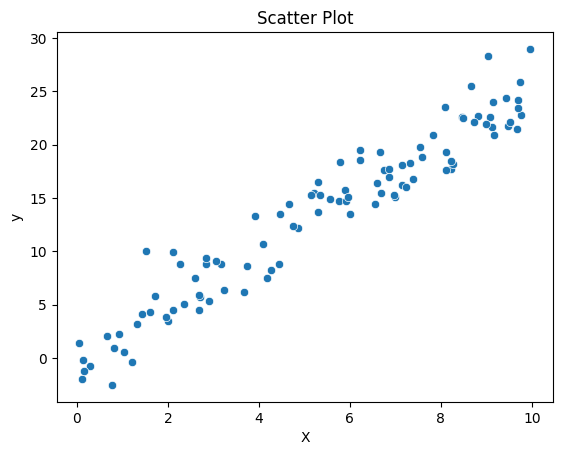

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# For demonstration, let's create a synthetic dataset
np.random.seed(80)
X = np.random.rand(100, 1) * 10
y = 2.5 * X.squeeze() + np.random.normal(scale=2, size=100)

df = pd.DataFrame({'X': X.squeeze(), 'y': y})

# Scatter plot
sns.scatterplot(x='X', y='y', data=df)
plt.title('Scatter Plot')
plt.show()

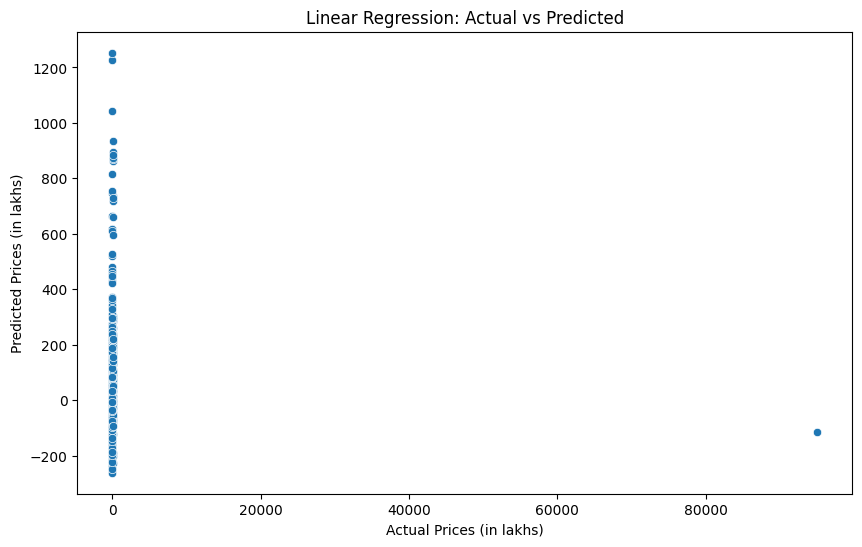

In [ ]:
# Plotting function
def plot_results(y_true, y_pred, model_name):
    plt.figure(figsize=(10,6 ))
    sns.scatterplot(x=y_true, y=y_pred)
    plt.title(f'{model_name} Regression: Actual vs Predicted')
    plt.xlabel('Actual Prices (in lakhs)')
    plt.ylabel('Predicted Prices (in lakhs)')


plt.show()


# Plot Linear Regression results
plot_results(y_test, y_pred_linear, 'Linear')

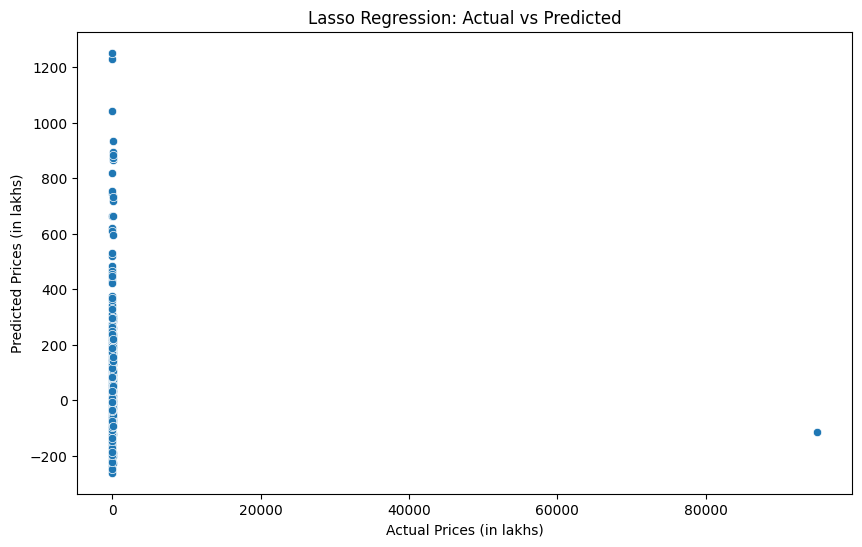

In [ ]:

# Plot Lasso Regression results
plot_results(y_test, y_pred_lasso, 'Lasso')

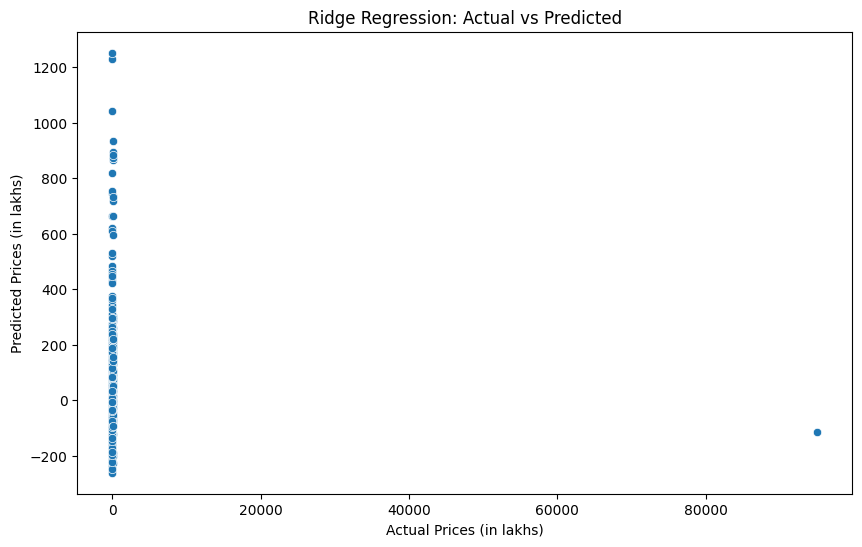

In [ ]:

# Plot Ridge Regression results
plot_results(y_test, y_pred_ridge, 'Ridge')
